<a href="https://colab.research.google.com/github/Shivani-Pathak/K-Mean/blob/main/Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :4]  # features for visualization
y = iris.target

print("X data:",X)
print("y data :",y)


X data: [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.

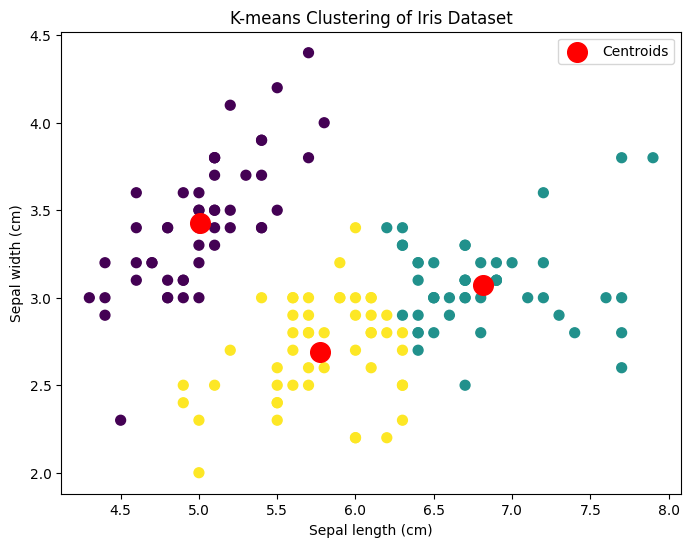

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # features for visualization
y = iris.target

# Number of clusters
k = 3

centroids = X[np.random.choice(X.shape[0], k, replace=False)]

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))


max_iterations = 100
for _ in range(max_iterations):
  labels = []
  for point in X:
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    labels.append(np.argmin(distances))
  labels = np.array(labels)

  new_centroids = np.zeros_like(centroids)
  for i in range(k):
      new_centroids[i] = np.mean(X[labels == i], axis=0)

  if np.all(centroids == new_centroids):
      break
  centroids = new_centroids


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)  # Plot points with assigned cluster labels
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=200, label='Centroids')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('K-means Clustering of Iris Dataset')
plt.legend()
plt.show()


In [ ]:
print(new_centroids)

[[6.82391304 3.07826087]
 [5.8        2.7       ]
 [5.00392157 3.40980392]]


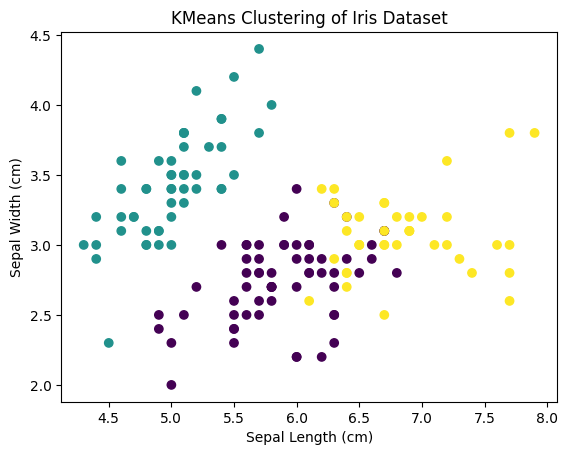

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(iris_df)


labels = kmeans.labels_

# Add cluster labels to the DataFrame
iris_df['Cluster'] = labels


plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'], c = iris_df['Cluster'])
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('KMeans Clustering of Iris Dataset')
plt.show()

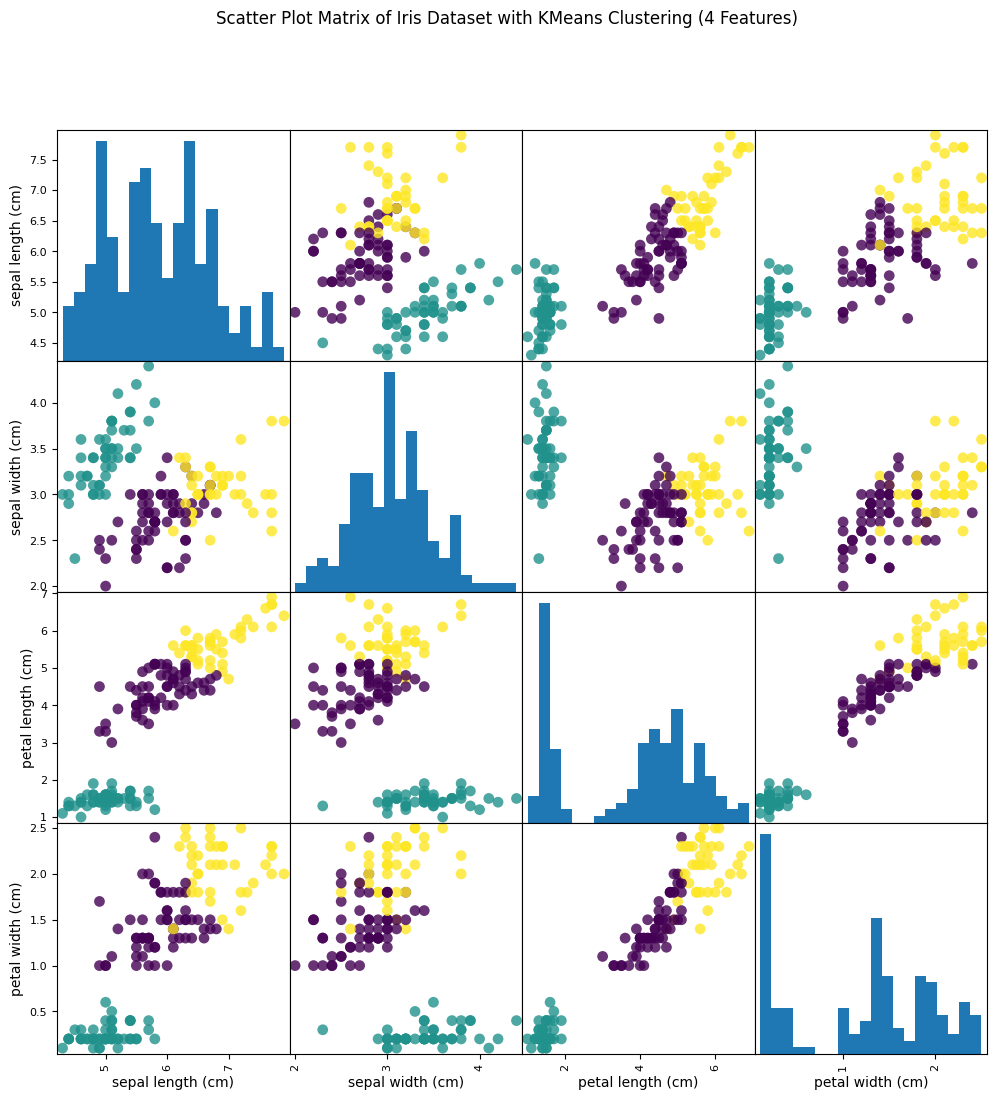

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Number of clusters
k = 3

kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Created a DataFrame
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['Cluster'] = labels

#scatter plot
colors = ['red', 'green', 'blue']
scatter_matrix(iris_df[iris.feature_names], c=iris_df['Cluster'], figsize=(12, 12), cmap='viridis', marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.suptitle('Scatter Plot Matrix of Iris Dataset with KMeans Clustering (4 Features)')
plt.show()

**K-mean clustering using T-SNE**

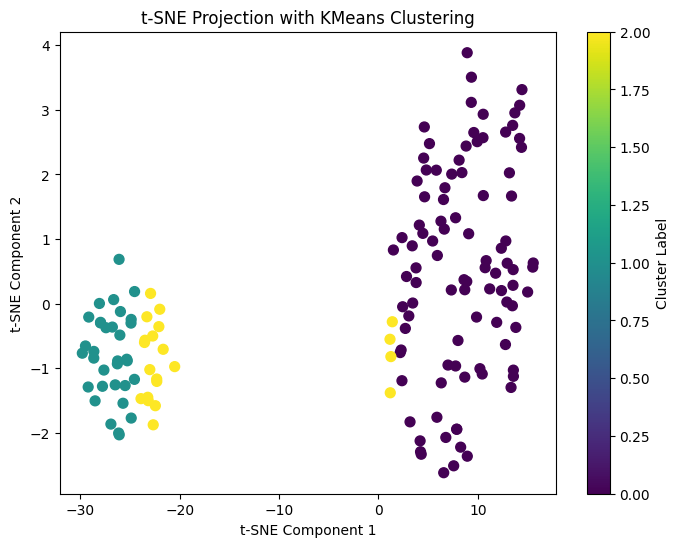

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply t-SNE for dimensionality reduction (reduce to 2 components)
tsne_model = TSNE(n_components=2, random_state=42)
X_tsne = tsne_model.fit_transform(X_scaled)


kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Plot t-SNE results with KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("t-SNE Projection with KMeans Clustering")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(label="Cluster Label")
plt.show()

